In [ ]:
#twitter sentiment analysis

In [ ]:
import tweepy#for access to twitter api
from textblob import TextBlob#for text processing
from wordcloud import WordCloud#generating the summary of words
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load data
from google.colab import files
uploaded=files.upload()

In [ ]:
#get the data
data=pd.read_csv('operationdudula.csv')

In [ ]:
data.head()#get the first 5 rows of the data

,Date,Tweets
0,10/11/2022 23:57,"b""RT @Umalumewabantu: @EversonLuhanga @Scrolla..."
1,10/11/2022 23:28,b'RT @SothoDudu: Patriots let\xe2\x80\x99s att...
2,10/11/2022 22:48,b'RT @PSAFLIVE: #OperationDudula for Ramaphosa...
3,10/11/2022 22:20,b'RT @PSAFLIVE: #OperationDudula for Ramaphosa...
4,10/11/2022 22:18,b'RT @PSAFLIVE: #OperationDudula for Ramaphosa...


In [13]:
data.tail()

,Date,Tweets,Subjectivity,Polarity,Analysis
1420,03/11/2022 01:54,b watch operationdudula providing assistance c...,0.5,-0.5,Negative
1421,03/11/2022 01:39,b if these internalitional drug dealers were n...,0.0,0.0,Neutral
1422,03/11/2022 00:53,b if these internalitional drug dealers were n...,0.0,0.0,Neutral
1423,02/11/2022 23:58,b watch operationdudula providing assistance c...,0.5,-0.5,Negative
1424,02/11/2022 23:57,bdude scaled up cressida bmw 7 series you guys...,0.0,0.0,Neutral


In [ ]:
data.columns#get columns in data

In [14]:
import re
re.compile('<title>(.*)</title>')
stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
#function to clean tweets
def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp=re.sub(r"(\\x(.){2})"," ",temp)
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#","", temp)
    temp=re.sub(r'rt[\s]+',' ',temp)#removed RT
    temp = re.sub(r'http\S+', '', temp)#remove hyperlink
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp=re.sub(r'conta','come',temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp
data['Tweets']=data['Tweets'].apply(clean_tweet)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,Date,Tweets,Subjectivity,Polarity,Analysis
0,10/11/2022 23:57,b its possible that among these criminals are ...,0.500000,0.000000,Neutral
1,10/11/2022 23:28,b patriots let s attend this numbers tomorrow ...,0.000000,0.000000,Neutral
2,10/11/2022 22:48,b operationdudula ramaphosa step down before n...,0.288889,-0.155556,Negative
3,10/11/2022 22:20,b operationdudula ramaphosa step down before n...,0.288889,-0.155556,Negative
4,10/11/2022 22:18,b operationdudula ramaphosa step down before n...,0.288889,-0.155556,Negative


In [15]:
data.tail(10)

,Date,Tweets,Subjectivity,Polarity,Analysis
1415,03/11/2022 03:06,b if these internalitional drug dealers were n...,0.00000,0.000,Neutral
1416,03/11/2022 02:59,b watch operationdudula providing assistance c...,0.50000,-0.500,Negative
1417,03/11/2022 02:25,b these companies need sta being held liable c...,0.41875,-0.125,Negative
1418,03/11/2022 02:09,b watch operationdudula providing assistance c...,0.50000,-0.500,Negative
1419,03/11/2022 02:04,b yes i fully agree n npatriots we cannot just...,0.00000,0.000,Neutral
1420,03/11/2022 01:54,b watch operationdudula providing assistance c...,0.50000,-0.500,Negative
1421,03/11/2022 01:39,b if these internalitional drug dealers were n...,0.00000,0.000,Neutral
1422,03/11/2022 00:53,b if these internalitional drug dealers were n...,0.00000,0.000,Neutral
1423,02/11/2022 23:58,b watch operationdudula providing assistance c...,0.50000,-0.500,Negative
1424,02/11/2022 23:57,bdude scaled up cressida bmw 7 series you guys...,0.00000,0.000,Neutral


In [16]:
#function to get subjetivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
#fubtcion to get polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity

#create two columns 
data['Subjectivity']=data['Tweets'].apply(getSubjectivity)
data['Polarity']=data['Tweets'].apply(getPolarity)

#show the new dataframe
data

,Date,Tweets,Subjectivity,Polarity,Analysis
0,10/11/2022 23:57,b its possible that among these criminals are ...,0.500000,0.000000,Neutral
1,10/11/2022 23:28,b patriots let s attend this numbers tomorrow ...,0.000000,0.000000,Neutral
2,10/11/2022 22:48,b operationdudula ramaphosa step down before n...,0.288889,-0.155556,Negative
3,10/11/2022 22:20,b operationdudula ramaphosa step down before n...,0.288889,-0.155556,Negative
4,10/11/2022 22:18,b operationdudula ramaphosa step down before n...,0.288889,-0.155556,Negative
...,...,...,...,...,...
1420,03/11/2022 01:54,b watch operationdudula providing assistance c...,0.500000,-0.500000,Negative
1421,03/11/2022 01:39,b if these internalitional drug dealers were n...,0.000000,0.000000,Neutral
1422,03/11/2022 00:53,b if these internalitional drug dealers were n...,0.000000,0.000000,Neutral
1423,02/11/2022 23:58,b watch operationdudula providing assistance c...,0.500000,-0.500000,Negative


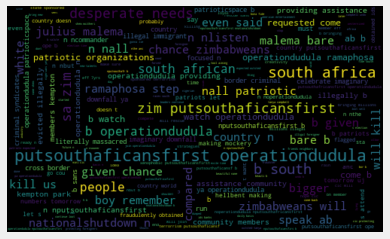

In [17]:
from pandas.core.common import random_state
#plot word cloud
allwords=' '.join([twts for twts in data['Tweets']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allwords)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [18]:
#create a function to compute the negative neutral and positive analysis
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'
data['Analysis']=data['Polarity'].apply(getAnalysis)

#show the dataframe
data


,Date,Tweets,Subjectivity,Polarity,Analysis
0,10/11/2022 23:57,b its possible that among these criminals are ...,0.500000,0.000000,Neutral
1,10/11/2022 23:28,b patriots let s attend this numbers tomorrow ...,0.000000,0.000000,Neutral
2,10/11/2022 22:48,b operationdudula ramaphosa step down before n...,0.288889,-0.155556,Negative
3,10/11/2022 22:20,b operationdudula ramaphosa step down before n...,0.288889,-0.155556,Negative
4,10/11/2022 22:18,b operationdudula ramaphosa step down before n...,0.288889,-0.155556,Negative
...,...,...,...,...,...
1420,03/11/2022 01:54,b watch operationdudula providing assistance c...,0.500000,-0.500000,Negative
1421,03/11/2022 01:39,b if these internalitional drug dealers were n...,0.000000,0.000000,Neutral
1422,03/11/2022 00:53,b if these internalitional drug dealers were n...,0.000000,0.000000,Neutral
1423,02/11/2022 23:58,b watch operationdudula providing assistance c...,0.500000,-0.500000,Negative


In [19]:
#print all of the positive tweets
j=1
sortedDF=data.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Positive'):
    print(str(j) + ')' +sortedDF['Tweets'][i])
    print()
    j=j+1

1)b we are ready n noperationdudula nputsouthafricansfirst nnationalshutdown

2)b i never seen whites coming forward supporting putsouthaficansfirst operationdudula or saying borders

3)b south africa s passpo risks losing value as it s used by more criminals n nputsouthaficansfirst nputsout

4)b this fence can be breached easily n nputsouthafricanfirst noperationdudula

5)b we are ready n noperationdudula nputsouthafricansfirst nnationalshutdown

6)b we are ready n noperationdudula nputsouthafricansfirst nnationalshutdown

7)b we are ready nnationalshutdown noperationdudula nputsouthafricansfirst

8)b we are ready nnationalshutdown noperationdudula nputsouthafricansfirst

9)b we are ready n noperationdudula nputsouthafricansfirst nnationalshutdown

10)b we are ready n noperationdudula nputsouthafricansfirst nnationalshutdown

11)b its not nigerians but police operationdudula has been consistent upfront t

12)b we are ready n noperationdudula nputsouthafricansfirst nnationalshutdown

1

In [20]:
#print all of the negative tweets
j=1
sortedDF=data.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Negative'):
    print(str(j) + ')' +sortedDF['Tweets'][i])
    print()
    j=j+1

1)b operationdudula ramaphosa step down before nationalshutdown n nall patriotic organizations are requested come

2)b operationdudula ramaphosa step down before nationalshutdown n nall patriotic organizations are requested come

3)b operationdudula ramaphosa step down before nationalshutdown n nall patriotic organizations are requested come

4)b operationdudula ramaphosa step down before nationalshutdown n nall patriotic organizations are requested come

5)b operationdudula ramaphosa step down before nationalshutdown n nall patriotic organizations are requested come

6)b so let me unpack this logic n nsouth africans can t complain about crimes foreign nationals do because south african

7)b operationdudula ramaphosa step down before nationalshutdown n nall patriotic organizations are requested come

8)b operationdudula ramaphosa step down before nationalshutdown n nall patriotic organizations are requested come

9)b operationdudula ramaphosa step down before nationalshutdown n nall pa

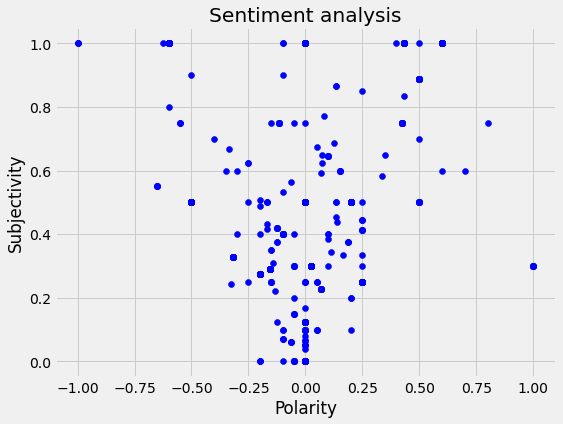

In [21]:
#Plot polarity and Subjectivity 
plt.figure(figsize=(8,6))
for i in range(0,data.shape[0]):
  plt.scatter(data['Polarity'][i],data['Subjectivity'][i],color='Blue')
plt.title('Sentiment analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [25]:
#percentage of positive tweets
ptweets=data[data.Analysis=='Positive']
pPtweets=ptweets['Tweets']
round ((pPtweets.shape[0]/data.shape[0]) *100,1)

27.2

In [24]:


#percentage of neutral tweets
nntweets=data[data.Analysis=='Neutral']
nntweets=nntweets['Tweets']
round ((nntweets.shape[0]/data.shape[0]) *100,1)


34.5

In [ ]:
#percentage of negative tweets
ntweets=data[data.Analysis=='Negative']
ntweets=ntweets['Tweets']
round ((ntweets.shape[0]/data.shape[0]) *100,1)

38.3

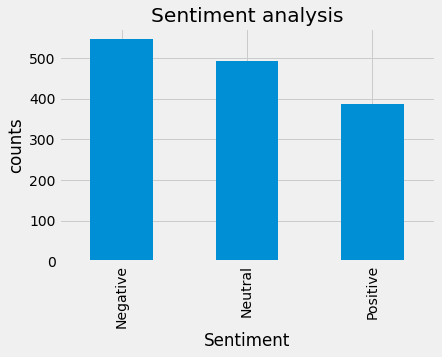

In [ ]:
#show the value counts
data['Analysis'].value_counts()
#plot and visualize the value counts
plt.title('Sentiment analysis')
plt.xlabel('Sentiment')
plt.ylabel('counts')
data['Analysis'].value_counts().plot(kind='bar')
plt.show()